In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [78]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [79]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

<AxesSubplot:ylabel='quality'>

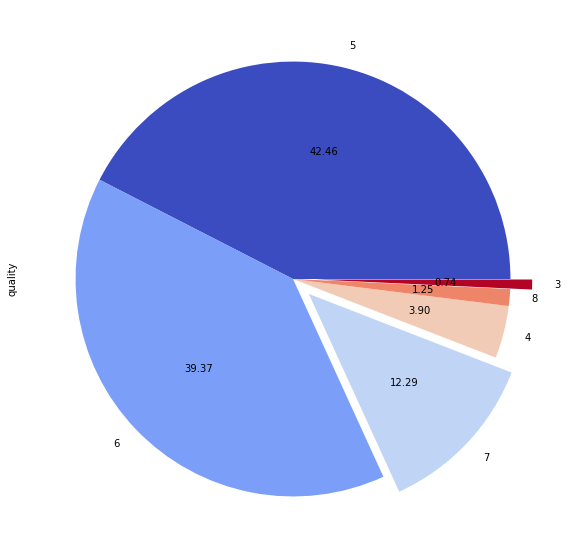

In [106]:
df['quality'].value_counts().plot(kind='pie',autopct='%0.2f',figsize=(10,10),cmap='coolwarm',explode=(0,0,0.1,0,0,0.1))

In [80]:
#Finding the duplicates from dataset.
df.duplicated().sum()

240

In [81]:
df.shape

(1599, 12)

In [84]:
#Removing all the duplicated records
df.drop_duplicates(inplace=True)

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


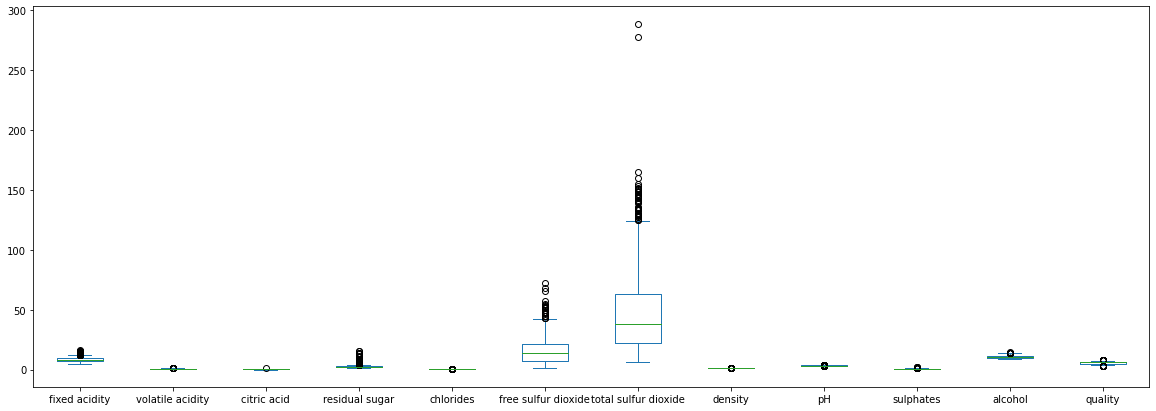

In [89]:
df.plot(kind='box',figsize = (20,7));

# Feature Engineering & Feature Transformation

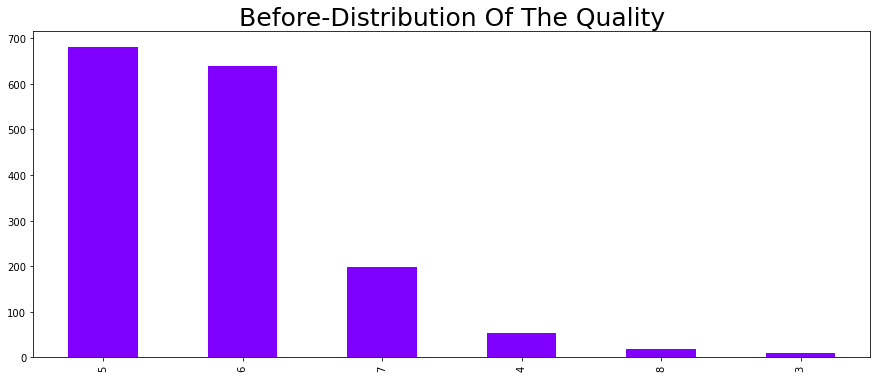

In [4]:
plt.figure(figsize=(15,6))
df['quality'].value_counts().plot(kind='bar',cmap='rainbow')
plt.title('Before-Distribution Of The Quality',fontsize = 25);

Doing feature transformation just to convert the target dataset into binary classification.

In [5]:
#Feature Engineering...
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

#Feature Transformation...
df['quality'].replace({'bad':0, 'good':1}, inplace=True)

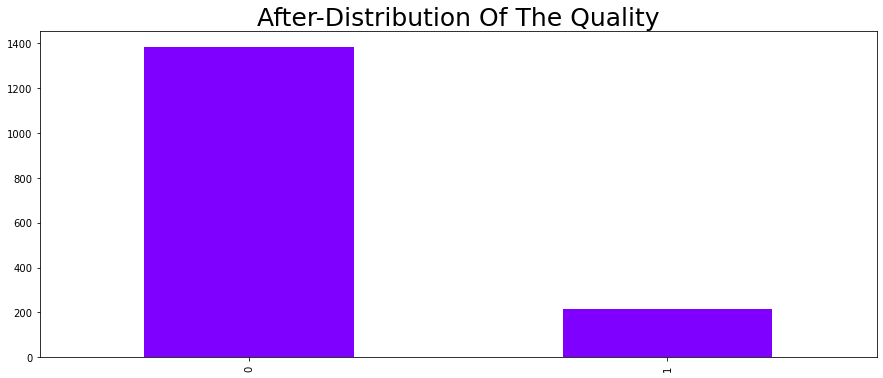

In [6]:
plt.figure(figsize=(15,6))
df['quality'].value_counts().plot(kind='bar',cmap='rainbow')
plt.title('After-Distribution Of The Quality',fontsize = 25);

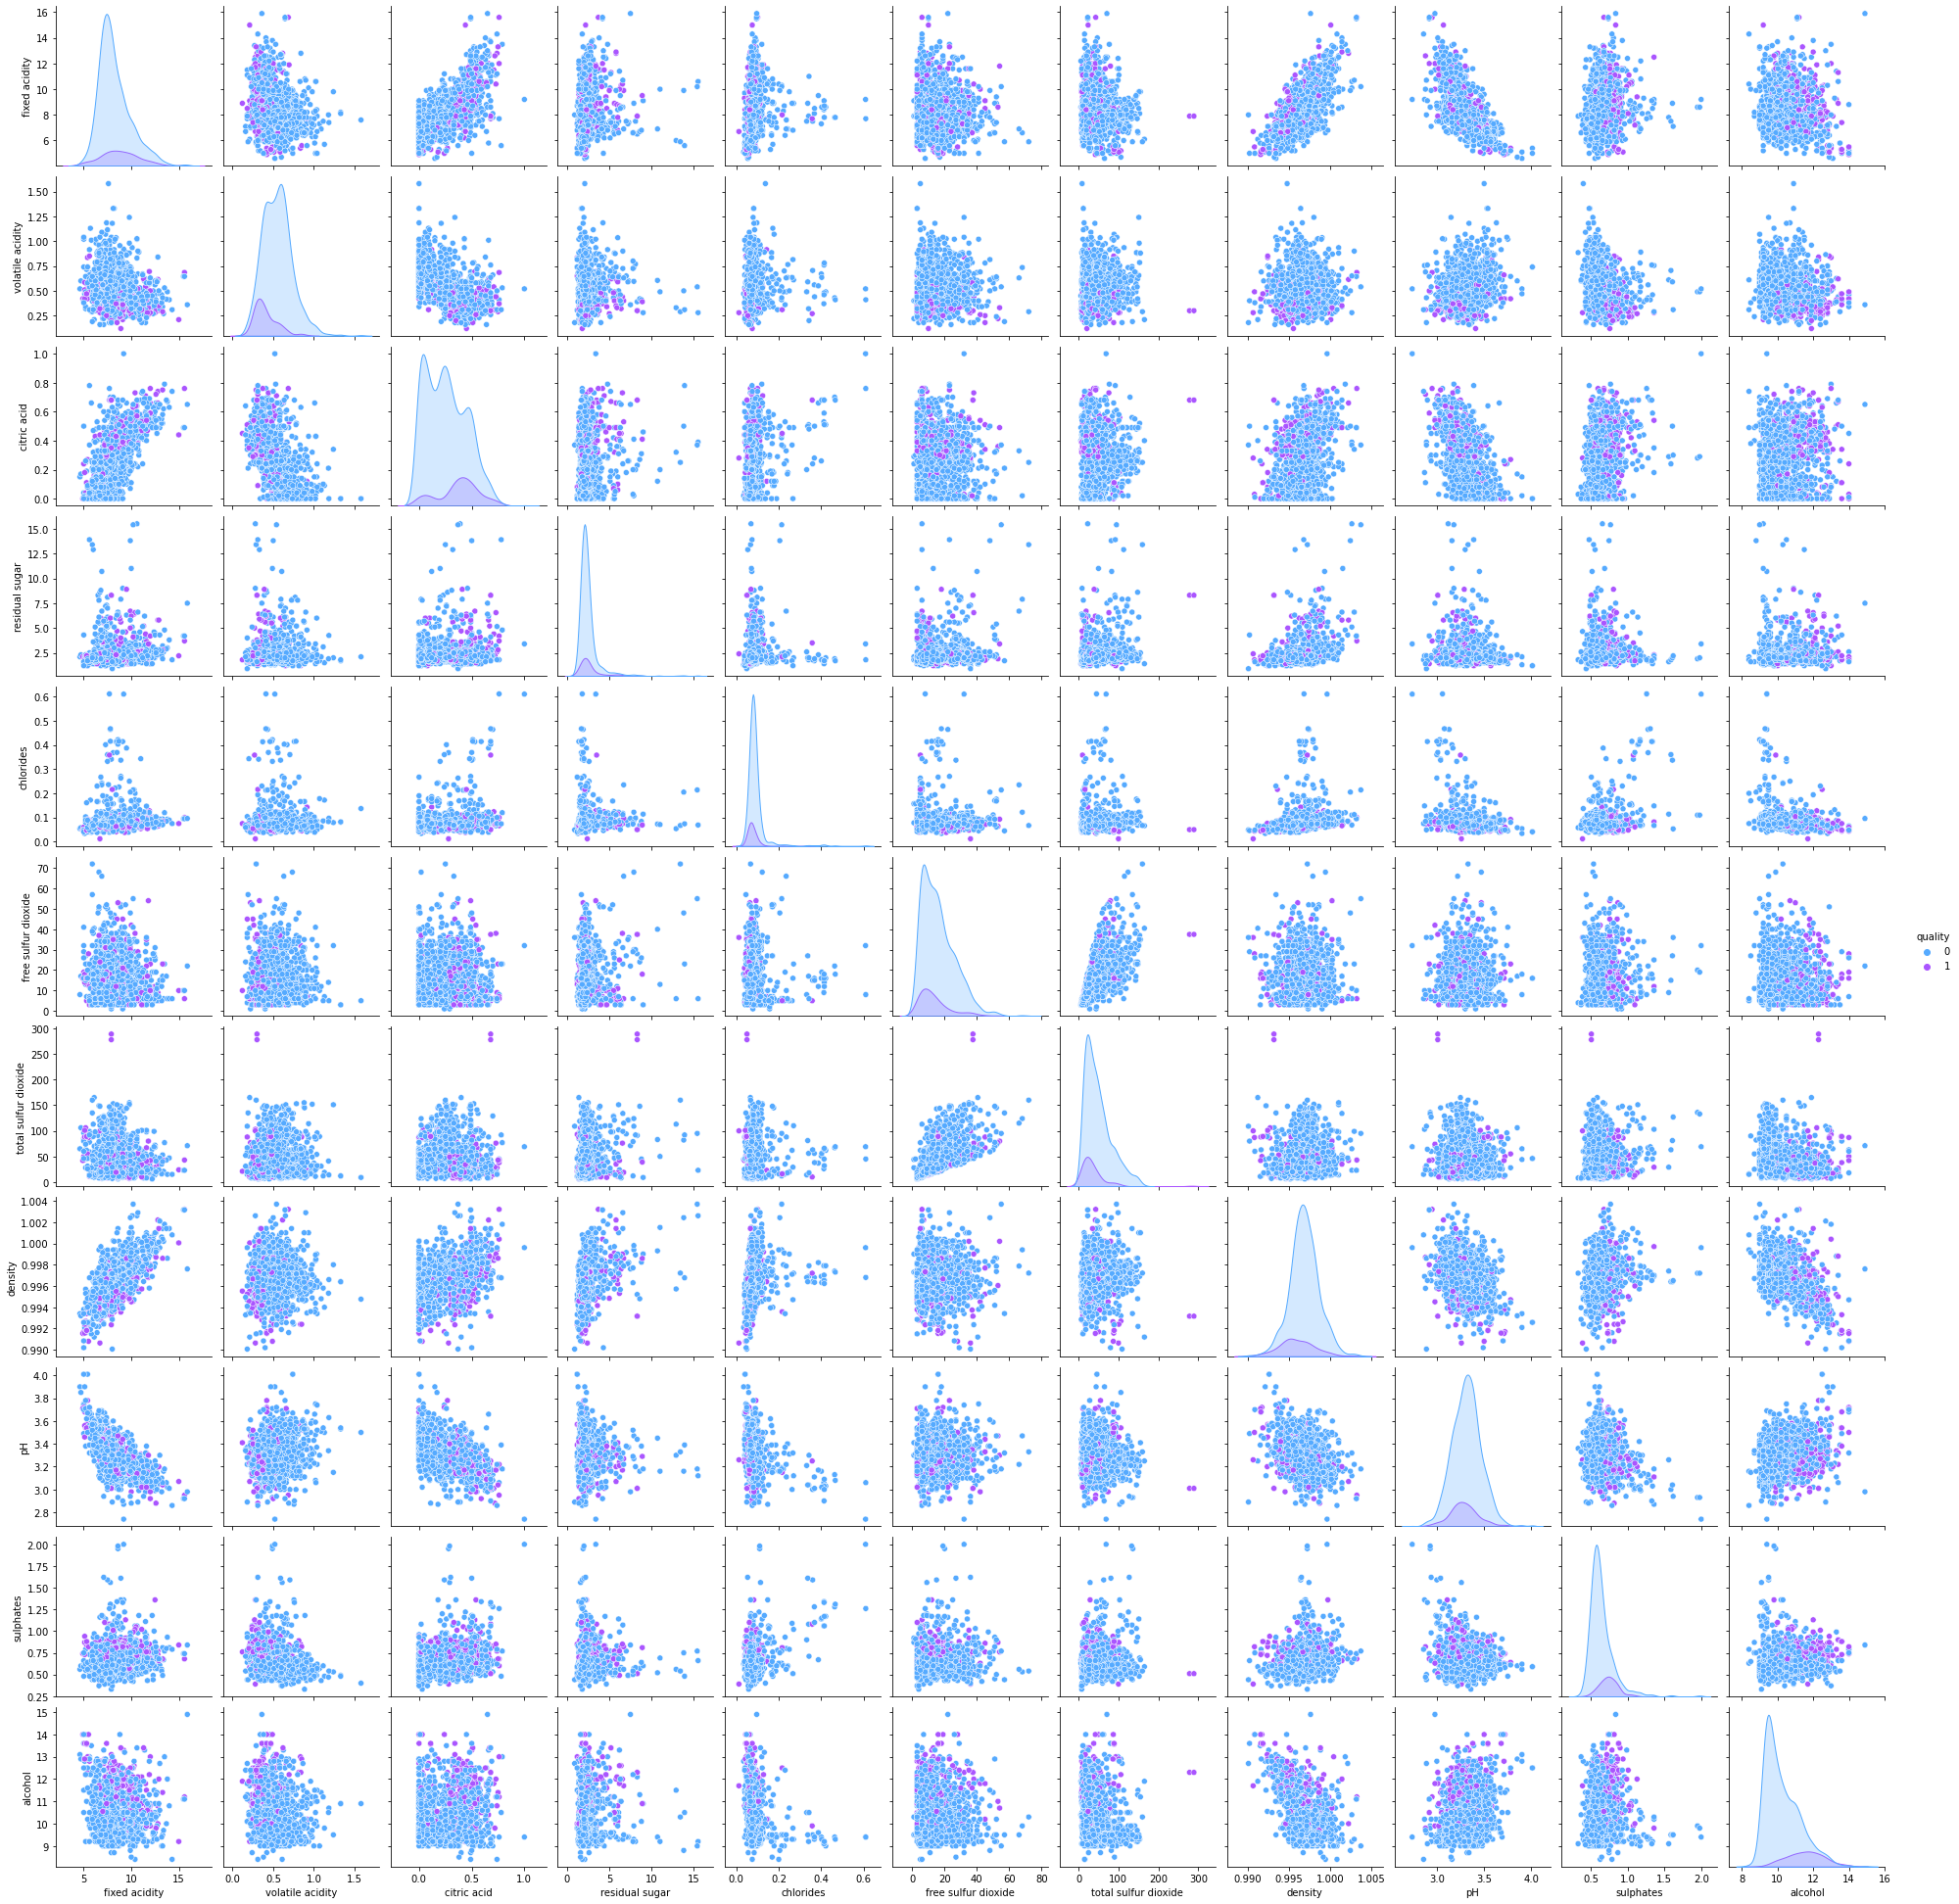

In [144]:
sns.pairplot(df,hue='quality',palette='cool');

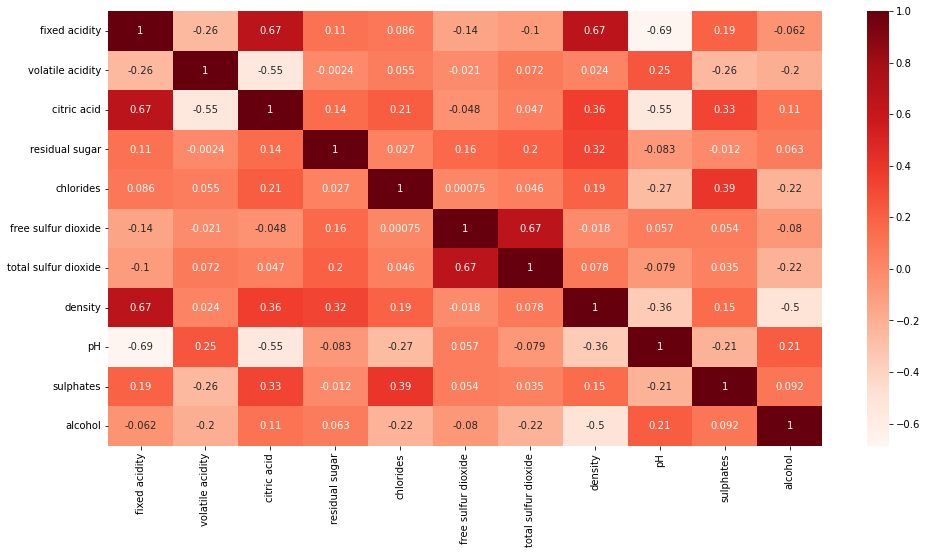

In [145]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='Reds');

# PCA Implementaion

In [7]:
#Feature Variables
x = df.drop('quality',axis=1)
#Target Variable
y = df['quality']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [256]:
# Applying PCA FOR DIMENSIONALITY REDUCTION
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.2842563  0.17408936 0.14065053 0.11707644 0.08568979 0.05596123
 0.05238642 0.03729716 0.03103652 0.01621414 0.00534211]


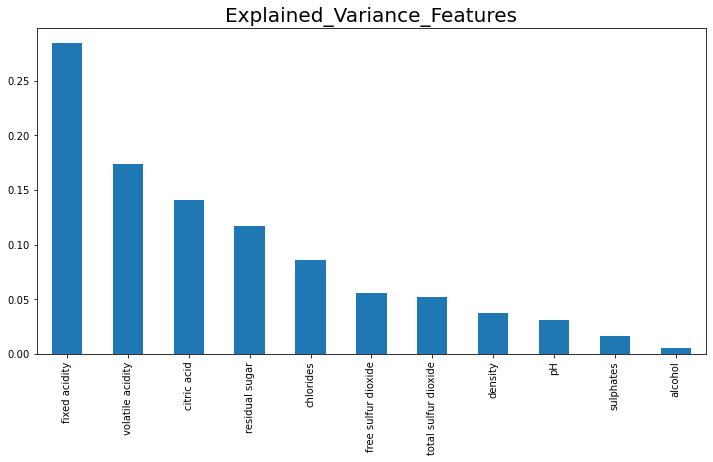

In [267]:
plt.figure(figsize=(12,6))
plt.title('Explained_Variance_Features',fontsize=20)
pd.Series(explained_variance,index=x.columns).plot(kind='bar')
plt.show()

In [236]:
pca.explained_variance_ratio_.cumsum()

array([0.2842563 , 0.45834567, 0.5989962 , 0.71607264, 0.80176243,
       0.85772366, 0.91011007, 0.94740723, 0.97844375, 0.99465789,
       1.        ])

This now more clearly shows the amount of variance explained as we add principal components.PC1 explains 28%, PC1 and PC2 explain 45.8%, PC1, PC2 and PC3 explain 59.8%, etc all the way up to 100% explained by all 11 principal components.

Component Scores:From the pca object generated, we can also get the components, which is defined in the Sklearn documentation as "Principal axes in feature space, representing the directions of maximum variance in the data"
Each array, pc1, pc2, etc has one value or 'score' for each variable. The score shows how much the variable influences the principal component.  Let's remind ourselves of what columns we have in the data.So in the above the first variable is teaching.If PC1 teaching scores 0.44, for PC2 teaching scores -0.17.  Clearly teaching is more influential on PC1 than PC2.

In [237]:
#pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc2
#pc3 = pca.components_[2]

array([-0.12618105,  0.26988241, -0.15982789,  0.2127745 ,  0.10854559,
        0.51193019,  0.58414963,  0.2214573 ,  0.01416835, -0.04177507,
       -0.41755143])

# Applying PCA for Feature Extraction

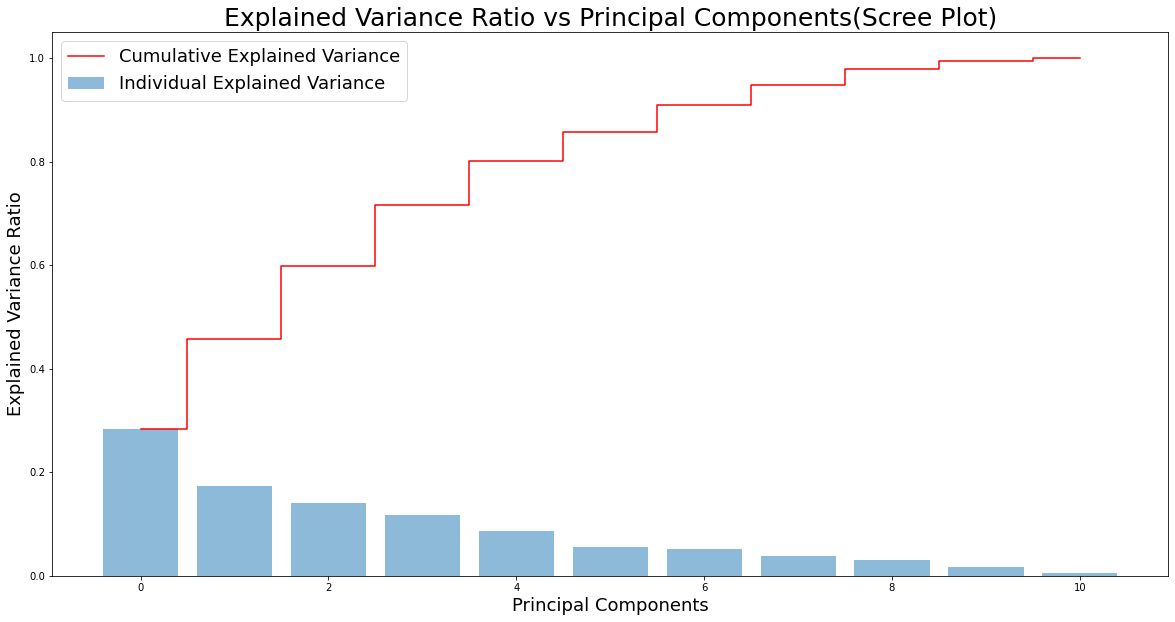

In [238]:
plt.figure(figsize=(20,10))
plt.bar(range(11), explained_variance,align='center',alpha=0.5,label='Individual Explained Variance')
plt.step(range(11),explained_variance.cumsum(),where='mid',label='Cumulative Explained Variance',c='red')
plt.ylabel('Explained Variance Ratio',fontsize = 18)
plt.xlabel('Principal Components',fontsize = 18)
plt.title('Explained Variance Ratio vs Principal Components(Scree Plot)',fontsize = 25)
plt.legend(loc='best',fontsize = 18)
plt.show()

<> I am selectin top 5 features

In [239]:
print(pca.explained_variance_ratio_)

[0.2842563  0.17408936 0.14065053 0.11707644 0.08568979 0.05596123
 0.05238642 0.03729716 0.03103652 0.01621414 0.00534211]


We can see individually the first principal component explains 35.45% of the total variation in the dataset.

The second principal component explains 21.71% of the total variation.

The third principal component explains 17.54% of the total variation.

The fourth principal component explains 14.6% of the total variation.

The fifth principal component explains 10.68% of the total variation.

Note that the percentages sum to 100%.

In [240]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.2842563  0.17408936 0.14065053 0.11707644 0.08568979]


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import *
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[257,  16],
       [ 22,  25]], dtype=int64)

# one more feature selection technique: Feature importance

In [10]:
dt.feature_importances_

array([0.07338758, 0.11762038, 0.05027329, 0.08405573, 0.06223881,
       0.09201512, 0.09686287, 0.02173687, 0.04518234, 0.15542748,
       0.20119952])

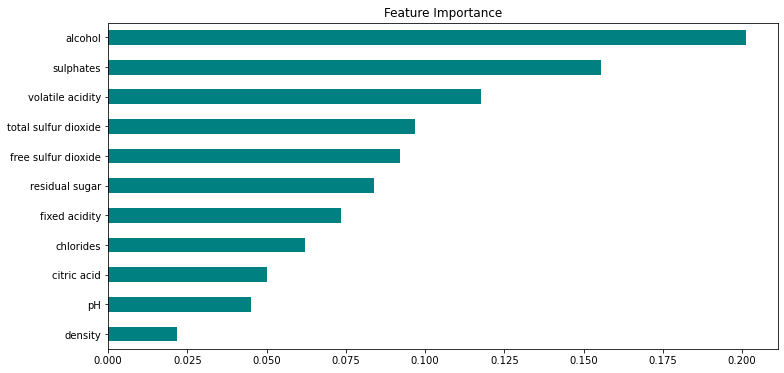

In [11]:
plt.figure(figsize=(12,6))
plt.title('Feature Importance')
pd.Series(dt.feature_importances_, index=x.columns).sort_values().plot(kind='barh',color='teal');


In [261]:
print('Accuracy of DecisionTreeClassifier Model : ',accuracy_score(y_test,y_pred)*100)

Accuracy of DecisionTreeClassifier Model :  86.02941176470588


In [262]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       238
           1       0.42      0.32      0.37        34

    accuracy                           0.86       272
   macro avg       0.66      0.63      0.64       272
weighted avg       0.85      0.86      0.85       272



# Hyper Parameter Tunning

In [244]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dt, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [245]:
dtc = grid_search.best_estimator_
Y_pred = dtc.predict(x_test)  
Y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [246]:
# best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}
0.8675094068405699


In [247]:
print('Accuracy of DecisionTreeModel After Hyperparameter Tuning :',accuracy_score(y_test, Y_pred))

Accuracy of DecisionTreeModel After Hyperparameter Tuning : 0.8860294117647058


In [248]:
print('Confusion Matix')
print(confusion_matrix(y_test,Y_pred))

Confusion Matix
[[226  12]
 [ 19  15]]


In [249]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       238
           1       0.56      0.44      0.49        34

    accuracy                           0.89       272
   macro avg       0.74      0.70      0.71       272
weighted avg       0.88      0.89      0.88       272



THANK YOU